In [18]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import preprocessing 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
data= pd.read_csv("/content/Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data['ShelveLoc'].unique

<bound method Series.unique of 0         Bad
1        Good
2      Medium
3      Medium
4         Bad
        ...  
395      Good
396    Medium
397    Medium
398       Bad
399      Good
Name: ShelveLoc, Length: 400, dtype: object>

In [5]:
x=data.iloc[:,0:6]
y=data['ShelveLoc']

In [6]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [7]:
y

0         Bad
1        Good
2      Medium
3      Medium
4         Bad
        ...  
395      Good
396    Medium
397    Medium
398       Bad
399      Good
Name: ShelveLoc, Length: 400, dtype: object

In [9]:
label_encoder= preprocessing.LabelEncoder()
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc'])

In [11]:
data['ShelveLoc'].unique()

array([0, 1, 2])

In [12]:
data.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [13]:
colnames = list(data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

**Building Decision Tree Classifier using Entropy Criteria**

In [14]:
# splitting dataset into train and test data 
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=30)

In [15]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

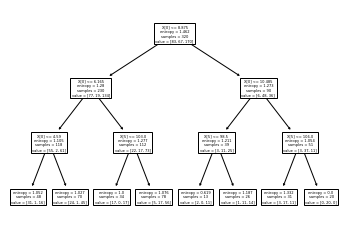

In [16]:
#PLot the decision tree
tree.plot_tree(model);

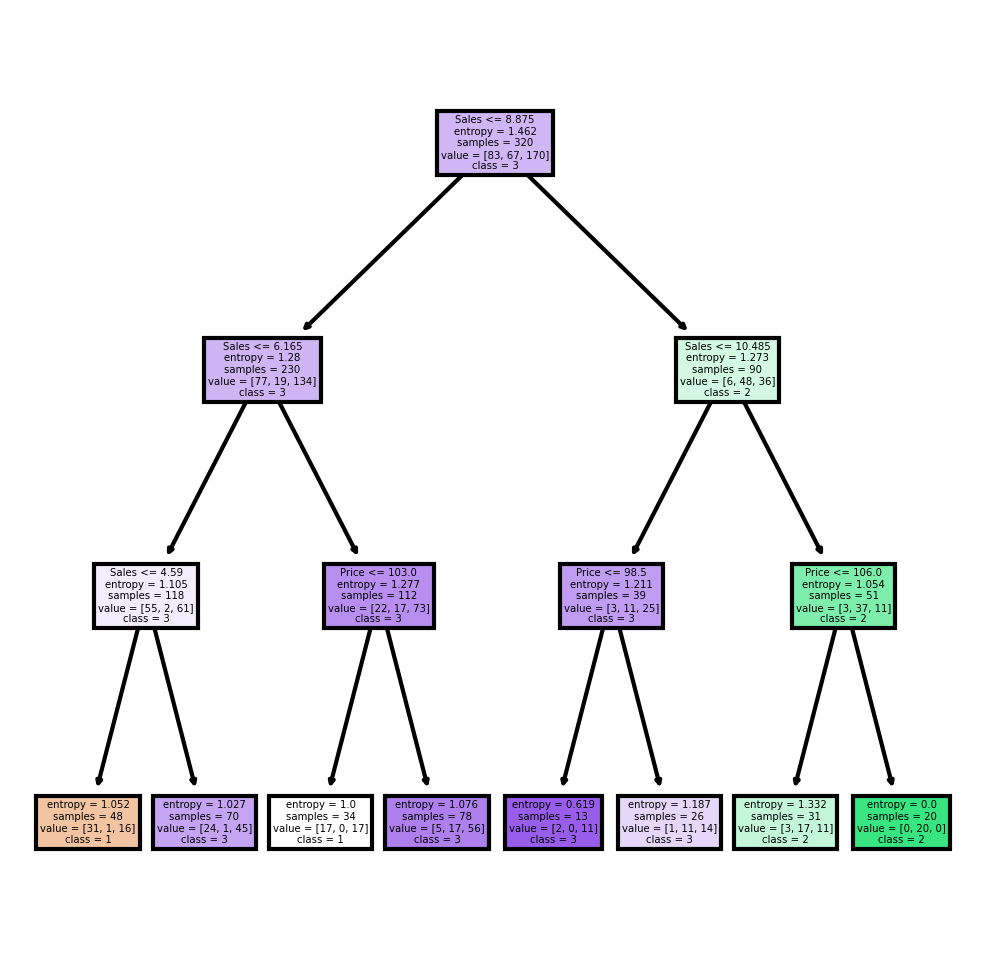

In [19]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [23]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

Medium    49
Bad       20
Good      11
dtype: int64

In [26]:
preds

array(['Good', 'Good', 'Good', 'Medium', 'Medium', 'Bad', 'Medium',
       'Medium', 'Good', 'Bad', 'Medium', 'Bad', 'Medium', 'Medium',
       'Medium', 'Bad', 'Bad', 'Bad', 'Medium', 'Medium', 'Bad', 'Medium',
       'Medium', 'Bad', 'Medium', 'Bad', 'Bad', 'Medium', 'Medium',
       'Medium', 'Good', 'Medium', 'Medium', 'Medium', 'Bad', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Bad',
       'Medium', 'Medium', 'Bad', 'Medium', 'Medium', 'Medium', 'Medium',
       'Bad', 'Bad', 'Medium', 'Good', 'Medium', 'Bad', 'Medium',
       'Medium', 'Bad', 'Good', 'Bad', 'Good', 'Medium', 'Medium',
       'Medium', 'Good', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Good', 'Medium', 'Medium', 'Medium', 'Bad', 'Medium', 'Bad',
       'Good', 'Medium'], dtype=object)

In [27]:
pd.crosstab(y_test,preds)

col_0,Bad,Good,Medium
ShelveLoc,,,
Bad,5,0,8
Good,0,7,11
Medium,15,4,30


In [28]:
# Accuracy 
np.mean(preds==y_test)

0.525

**Building Decision Tree Classifier (CART) using Gini Criteria**

In [29]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [30]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.525